In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

c:\Users\leiyo\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

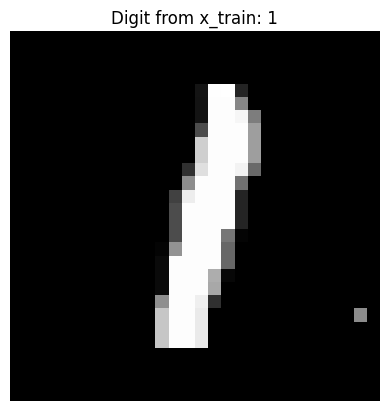

In [11]:
import matplotlib.pyplot as plt

# Select an index of the image you want to visualize
image_index = 251  # You can change this index to any value between 0 and the length of x_train or x_test

# Display the image
plt.imshow(x_train[image_index], cmap='gray')
plt.title('Digit from x_train: {}'.format(y_train[image_index]))
plt.axis('off')  # Turn off the axis
plt.show()

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # we have 10 digits

In [17]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
optimizer=tf.keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss (before training):', score[0])
print('Test accuracy (before training):', score[1])

Test loss (before training): 2.3051719665527344
Test accuracy (before training): 0.10480000078678131


In [19]:
model.fit(
    x_train, y_train, 
    batch_size=128, 
    epochs=10, 
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/10
469/469 [==============================] - 87s 183ms/step - loss: 2.2753 - accuracy: 0.1481 - val_loss: 2.2329 - val_accuracy: 0.2760
Epoch 2/10
469/469 [==============================] - 85s 181ms/step - loss: 2.2000 - accuracy: 0.2587 - val_loss: 2.1386 - val_accuracy: 0.4581
Epoch 3/10
469/469 [==============================] - 90s 192ms/step - loss: 2.1010 - accuracy: 0.3670 - val_loss: 2.0060 - val_accuracy: 0.5911
Epoch 4/10
469/469 [==============================] - 85s 182ms/step - loss: 1.9622 - accuracy: 0.4718 - val_loss: 1.8280 - val_accuracy: 0.6845
Epoch 5/10
469/469 [==============================] - 87s 185ms/step - loss: 1.7891 - accuracy: 0.5438 - val_loss: 1.6105 - val_accuracy: 0.7289
Epoch 6/10
469/469 [==============================] - 87s 185ms/step - loss: 1.5967 - accuracy: 0.5889 - val_loss: 1.3838 - val_accuracy: 0.7619
Epoch 7/10
469/469 [==============================] - 86s 184ms/step - loss: 1.4112 - accuracy: 0.6245 - val_loss: 1.1772 - val_ac

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7845525741577148
Test accuracy: 0.8248000144958496
